## STATISTIC FOR DATA SCIENCE HOMEWORK
### created by Inad
18 November 2019
* * *

In [4]:
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import defaultdict

In [5]:
df = pd.read_csv('csv/car_dataset.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
df.shape[0]
df.shape[1]

print ("Dataframe terdiri dari", df.shape[0], "baris dan", df.shape[1],"kolom")

Dataframe terdiri dari 11914 baris dan 16 kolom


In [7]:
print("Berikut merupakan label/kolom dan type data dari dataframe yang akan dilakukan analisa: ");
df.info();

Berikut merupakan label/kolom dan type data dari dataframe yang akan dilakukan analisa: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
Make                 11914 non-null object
Model                11914 non-null object
Year                 11914 non-null int64
Engine Fuel Type     11911 non-null object
Engine HP            11845 non-null float64
Engine Cylinders     11884 non-null float64
Transmission Type    11914 non-null object
Driven_Wheels        11914 non-null object
Number of Doors      11908 non-null float64
Market Category      8172 non-null object
Vehicle Size         11914 non-null object
Vehicle Style        11914 non-null object
highway MPG          11914 non-null int64
city mpg             11914 non-null int64
Popularity           11914 non-null int64
MSRP                 11914 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.5+ MB


In [8]:
# Make                : Car Make
# Model               : Car Model
# Year                : Car Year (Marketing)
# Engine Fuel Type    : Engine Fuel Type
# Engine HP           : Engine Horse Power (HP)
# Engine Cylinders    : Engine Cylinders
# Transmission Type   : Transmission Type
# Driven_Wheels       : Driven Wheels
# Number of Doors     : Number of Doors
# Market Category     : Market Category
# Vehicle Size        : Size of Vehicle
# Vehicle Style       : Type of Vehicle
# highway MPG         : Highway MPG
# city mpg            : City MPG
# Popularity          : Popularity (Twitter)
# MSRP                : Manufacturer Suggested Retail Price

### DATA VISUALIZATION

Distribusi Jumlah Mobil berdasarkan taun pembuatan

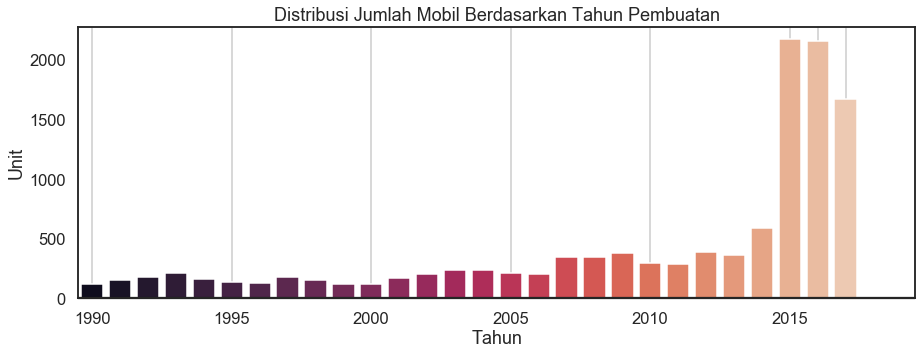

In [9]:
dic = {1990+i : sum(df['Year']==1990+i) for i in range(30)}
x_dic = [1990 + i for i in range(30)]
y_dic = [dic[1990 + i] for i in range(30)]

sns.set(style="white", context = "talk")
f, ax1 = plt.subplots(1,1,figsize=(15,5))
ax1.set_title('Distribusi Jumlah Mobil Berdasarkan Tahun Pembuatan')
splot = sns.barplot(x=x_dic, y=y_dic, palette="rocket", ax=ax1)

ax1.axhline(0, color = "k", clip_on=False)
ax1.set_ylabel("Diverging")
ax1.set_xlabel('Tahun')
ax1.set_ylabel('Unit')
locs, labels = plt.xticks()

plt.xticks([0,5,10,15,20,25,26,27],['1990','1995','2000','2005','2010','2015'])
plt.grid(axis = 'x')
plt.show()

In [10]:
import operator
dic_max = max(zip(dic.values(), dic.keys()))
dic_max

#max(zip(dic.values())
#max(zip(dic.keys())

(2170, 2015)

### What are the most represented car brands?

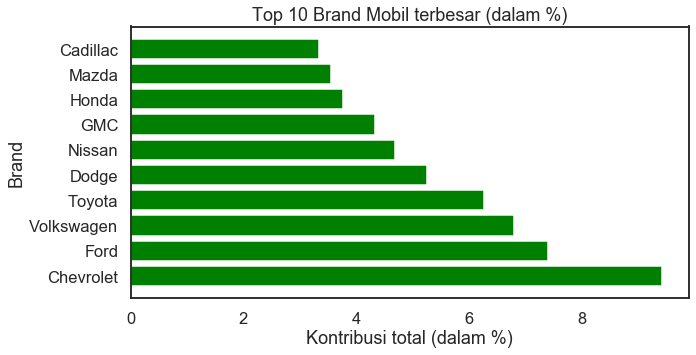

In [11]:
#percentase
counts = df['Make'].value_counts()*100/sum(df['Make'].value_counts())

#9 most
popular_labels = counts.index[:10]

#plot
plt.figure(figsize=(10,5))
plt.barh(popular_labels,width=counts[:10], color = 'green')
plt.title('Top 10 Brand Mobil terbesar (dalam %)')
plt.xlabel('Kontribusi total (dalam %)')
plt.ylabel('Brand')
plt.show()

In [12]:
#kombinasi taun dan merek
pivot = pd.pivot_table(df, index=['Year','Make'], values=['Popularity'], aggfunc=sum)
print(pivot)

                 Popularity
Year Make                  
1990 Audi             18630
     Buick             1085
     Cadillac          3248
     Chevrolet         2770
     Chrysler          2026
...                     ...
2017 Porsche          42875
     Subaru           30080
     Toyota          353394
     Volkswagen       56745
     Volvo            21750

[735 rows x 1 columns]


In [13]:
counts_brand = df['Make'].value_counts()*100/sum(df['Make'].value_counts())
counts_year = df['Year'].value_counts()*100/sum(df['Year'].value_counts())
counts_year.head(10)


2015    18.213866
2016    18.104751
2017    14.000336
2014     4.943764
2012     3.248279
2009     3.181131
2013     3.072016
2008     2.929327
2007     2.895753
2010     2.501259
Name: Year, dtype: float64

In [14]:
print("Dari Total",len(counts),"jenis brand mobil yang ada dalam dataset, terlihat bahwa 10 top brands  \n pada dataset berkontribusi",
        sum(counts[:10]), "% dari total jumlah mobil yang ada di dataset")

Dari Total 48 jenis brand mobil yang ada dalam dataset, terlihat bahwa 10 top brands  
 pada dataset berkontribusi 54.78428739298305 % dari total jumlah mobil yang ada di dataset


WARNING

<br> Proporsi brand di atas hanya berdasarkan dataset, bukan mencerminkan kondisi yg ada di pasar sebenarnya.
<br> Sebuah brand mobil yang memiliki lebih banyak varian model linear dengan jumlah mobil yang ada di jalan

### Rata2 harga mobil per tahun

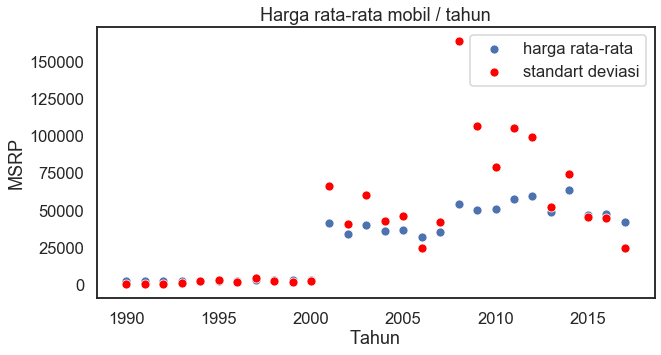

In [15]:
mean_price = pd.DataFrame({'index' : [df[['Year','MSRP']].groupby(['Year']).mean().index[i] for i in range(28)],
                           'meanprice' : [df[['Year','MSRP']].groupby(['Year']).mean().iloc[i] for i in range(28)]})
std_price = pd.DataFrame({'index' : [df[['Year','MSRP']].groupby(['Year']).std().index[i] for i in range(28)],
                           'stdprice' : [df[['Year','MSRP']].groupby(['Year']).std().iloc[i] for i in range(28)]})


fig, ax1 = plt.subplots(figsize=(10,5))
#fig.subplots_adjust(wspace=0.05)


ax1 = sns.scatterplot(x='index', y='meanprice', data = mean_price, label = 'harga rata-rata', palette = 'Set2')
ax1 = sns.scatterplot(x='index', y='stdprice', data = std_price, color = 'red', label = "standart deviasi")
ax1.set_title('Harga rata-rata mobil / tahun')
ax1.set_xlabel('Tahun')
ax1.set_ylabel('MSRP')
sns.set_style("darkgrid")
plt.show()

.: There is a high std for year 2009
<br> .: No need to treat outliers for 2009 to 2012 year

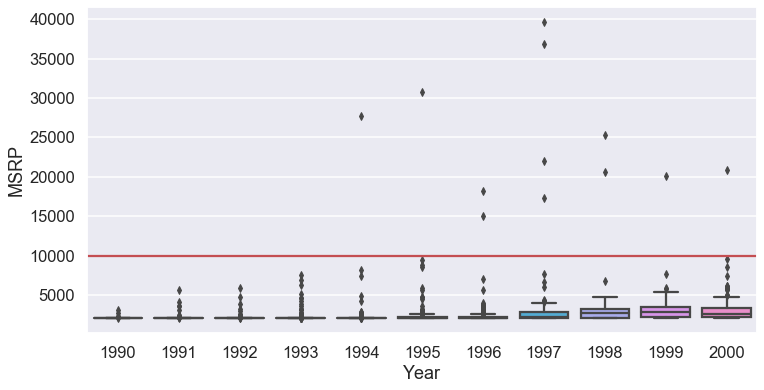

In [20]:
df_below_2000 = df[df['Year']<=2000]

plt.figure(figsize = (12,6))
sns.boxplot(x="Year", y="MSRP", data = df_below_2000)
plt.axhline(y=10000, color='r')
plt.show()

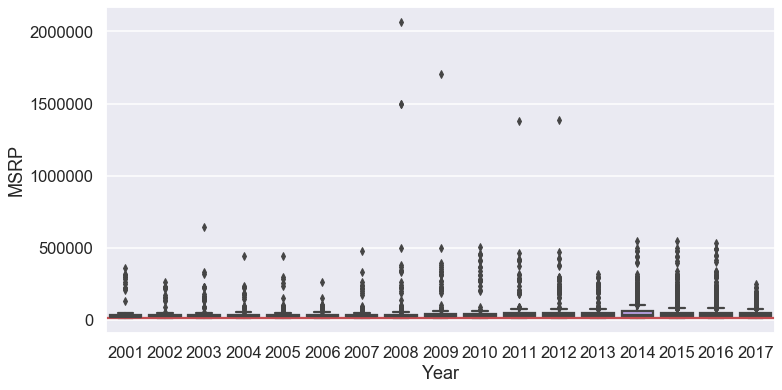

In [21]:
df_above_2000 = df[df['Year']>2000]

plt.figure(figsize = (12,6))
sns.boxplot(x="Year", y="MSRP", data = df_above_2000)
plt.axhline(y=10000, color='r')
plt.show()

- Many outliers, lets get rid on above 10k USD cars

In [ ]:
#filter
df = df.loc[((df['Year']<=2000) & (df['MSRP']<10000)) | (df['Year']>2000)]

df_below_2000_new = df.copy()
df_below_2000_new = df_below_2000_new[df_below_2000_new['Year']<=2000]

plt.figure(figsize=(10,5))
sns.boxplot(x="Year", y="MSRP", data=df_below_2000_new)
plt.show()

In [ ]:
df.index = np.arange(df.shape[0])

In [ ]:
prices = df[['Make','MSRP']].loc[(df['Make']=='Chevrolet')|
                                (df['Make'] == 'Ford')|
                                (df['Make'] == 'Volkswagen')|
                                (df['Make'] == 'Toyota')|
                                (df['Make'] == 'Dodge')|
                                (df['Make'] == 'Nissan')|
                                (df['Make'] == 'GMC')|
                                (df['Make'] == 'Honda')|
                                (df['Make'] == 'Mazda')].groupby('Make').mean()
print(prices)

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(x="Year", y ="MSRP", data = df[['Make','Year','MSRP']].loc[((df['Make']=='Chevrolet')|
                                                                        (df['Make']=='Ford')|
                                                                        (df['Make']=='Volkswagen')|
                                                                        (df['Make']=='Toyota')|
                                                                        (df['Make']=='Dodge')|
                                                                        (df['Make']=='Nissan')|
                                                                        (df['Make']=='GMC')|
                                                                        (df['Make']=='Honda')|
                                                                        (df['Make']=='Mazda')) & (df['Year']>2000)])
plt.grid()
plt.show()

In [ ]:
df.corr()

**High correlation between**
<br> - Engine cylinders & Engine HP
<br> - Highway mpg & city mpg

**The more Cyliders there are, the more powerfull the car is**

### Correlation Matrix

In [35]:
df.corr()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.000000,0.351794,-0.041479,0.263787,0.258240,0.198171,0.073049,0.227590
Engine HP,0.351794,1.000000,0.779988,-0.102713,-0.406563,-0.439371,0.037501,0.662008
Engine Cylinders,-0.041479,0.779988,1.000000,-0.140088,-0.621606,-0.600776,0.041145,0.531312
Number of Doors,0.263787,-0.102713,-0.140088,1.000000,0.118570,0.120881,-0.048272,-0.126635
highway MPG,0.258240,-0.406563,-0.621606,0.118570,1.000000,0.886829,-0.020991,-0.160043
city mpg,0.198171,-0.439371,-0.600776,0.120881,0.886829,1.000000,-0.003217,-0.157676
Popularity,0.073049,0.037501,0.041145,-0.048272,-0.020991,-0.003217,1.000000,-0.048476
MSRP,0.227590,0.662008,0.531312,-0.126635,-0.160043,-0.157676,-0.048476,1.000000


In [ ]:
list_numeric = [(type(df.iloc[0,i]) == np.int64 or type(df.iloc[0,i]) == np.float64) for i in range(df.shape[1])]

list_numeric = [i*j for i, j in zip(df.columns, list_numeric)]

def clean(liste):
    resu = []
    for i in range(len(liste)):
        if (liste[i]!=''):
            resu.append(liste[i])
    return(resu)
    
print(clean(list_numeric))

In [ ]:
print('We just figured out that : list(df.describe().columns) gives the same result')
print(list(df.describe().columns), '\nin just one line...')

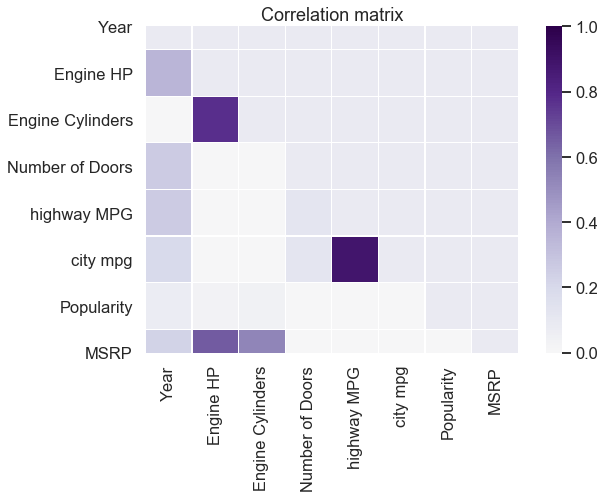

In [62]:
corr = df.corr()
# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
# return the indices for the upper triangle of an (n,m) array
mask[np.triu_indices_from(mask)] = True

sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,6))
plt.title("Correlation matrix")
sns.heatmap(corr, mask=mask, cmap="PuOr",
            square=True, annot_kws={"size":10},vmin=0, vmax = 1, center = 0, linewidths = .2)
plt.show()

### Engine cylinders histogram

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(df['Engine Cylinders'].values, bins = 24, align = 'left')
plt.title('Engine cylinders histogram')
plt.xlabel('Nb of cylinders')
plt.ylabel('Nb of cars')
plt.xlim([-1,13])
plt.ylim([0,5000])
plt.grid()
plt.show()

### Transmission type Pie

In [ ]:
df['Transmission Type'].value_counts()

In [ ]:
##### Data to plot
labels = ['AUTOMATIC', 'MANUAL', 'AM', 'DD', '']
sizes = [8266,2935,626,68,19]
colors = ['mediumorchid', 'gold', 'mediumseagreen', 'steelblue','khaki']
# Plot
plt.figure(figsize=(5,5))
plt.title('Pie chart of transmission type').set_position([0.5,1.1])
plt.pie(sizes, labels=labels, colors=colors, startangle=140)
#plt.legend()
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.axis('equal')

plt.show()
print('   AUTOMATIC :           69.4%\n   MANUAL :              24.6%\n   AM : AUTOMATED MANUAL 5.3%\n   DD : DIRECT DRIVE     0.7% \n')

ALmost 70% of cars are automatic.  For decades automatic transmission have been considered much more convenient in the USA than in Europe. The American car industry was more competitive, with more powerful engines and cheap fuel.

### Driven Wheels PIE

In [ ]:
df['Driven_Wheels'].value_counts()

In [ ]:
# Data to plot
labels = ['front wheel drive', 'rear wheel drive', 'all wheel drive', 'four wheel drive']
sizes = [4787,3371,2353,1403]
colors = ['mediumorchid', 'gold', 'mediumseagreen', 'steelblue']
# Plot
plt.figure(figsize=(5,5))
plt.title('Pie chart of driven wheels variable').set_position([0.5,1.1])
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=140)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.axis('equal')

plt.show()

In [ ]:
# Proportion of number of doors
round(df['Number of Doors'].value_counts()*100/sum(df['Number of Doors'].value_counts()),2)

### Vehicle Size Pie

In [ ]:
round(df['Vehicle Size'].value_counts()*100/sum(df['Vehicle Size'].value_counts()),2)

In [ ]:
# Data to plot
labels = ['Compact', 'Midsize', 'Large']
sizes = [4764,4373,2777]
colors = ['plum', 'violet', 'purple']
# Plot
plt.figure(figsize=(5,5))
plt.title('Pie chart of the vehicle size').set_position([0.5,1.1])
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=140)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.axis('equal')

plt.show()

### Popularity VS Vehicle Size

In [ ]:
# Create data
g1 = (df.loc[np.where(df['Vehicle Size']=='Compact')[0],'Popularity'],df.loc[np.where(df['Vehicle Size']=='Compact')[0],'MSRP'])
g2 = (df.loc[np.where(df['Vehicle Size']=='Large')[0],'Popularity'],df.loc[np.where(df['Vehicle Size']=='Large')[0],'MSRP'])
g3 = (df.loc[np.where(df['Vehicle Size']=='Midsize')[0],'Popularity'],df.loc[np.where(df['Vehicle Size']=='Midsize')[0],'MSRP'])
 
data = (g1, g2, g3)
colors = ("green", "red", "orange")
groups = ("Compact cars", "Large cars", "Midsize cars") 

# Group popularity by make
df_scatter = df.copy()
df_scatter = df_scatter[['Make','Popularity','Vehicle Size','MSRP']]

# Create plot
fig = plt.figure(figsize=(18,8), dpi = 60)
ax = fig.add_subplot(1, 2, 1)

# for data, color, group in zip(data, colors, groups):
#     x, y = data
#     ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

ax = sns.scatterplot(x="Popularity", y="MSRP",
                      hue="Vehicle Size", size="Vehicle Size",
                      data=df)
    
plt.title('MSRP and popularity per size car')
plt.legend(loc=2)
plt.xlabel('Popularity')
plt.ylabel('MSRP')
plt.ylim([0,750000])
plt.xlim([0,6000])

plt.show()

### ngupi sek om...